Binary Classification <br>


In [34]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(22)

means = [[2,2], [4,2]]
cov = [[.3,.2], [.2,.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) #class 1
X1 = np.random.multivariate_normal(means[1], cov, N) #class 1
X = np.concatenate((X0.T, X1.T), axis = 1) #all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) #all data

In [35]:
from cvxopt import matrix, solvers

#build K
V = np.concatenate((X0.T, -X1.T), axis=1) #V=[y1x1, y2x2,...,ynxn]
K = matrix(V.T.dot(V)) #K = V^T.V

p = matrix(-np.ones((2*N, 1))) #all-one vector

#build A, b, G, h
G = matrix(-np.eye(2*N)) #for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda=0
b = matrix(np.zeros((1, 1))) #Xigma lamda . y = 0, 1x10.10x1 = 1x1

"""
x = argmin(0.5x^TPx+q^Tx+r)
subject to Gx <= h , Ax = b
"""
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


In [36]:
epsilon = 1e-6
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

#calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[-2.00984381  0.64068336]]
b =  4.668560633868097


In [37]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Roboto']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

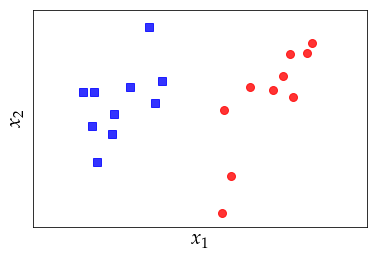

In [38]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)


# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

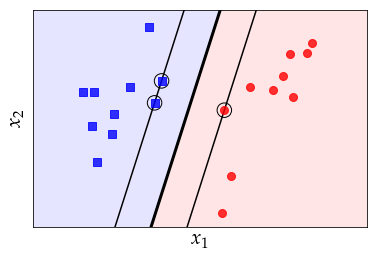

In [39]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('svm4.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')


    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)


    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

In [33]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
y = y.reshape((2*N,))
clf.fit(X.T, y ) # each sample is one row

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

w =  [[-2.00971102  0.64194082]]
b =  [4.66595309]
